<a href="https://colab.research.google.com/github/Habibawally/Quality-of-fruits/blob/main/pattern(Quality_of_fruits).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import time
import matplotlib.pyplot as plt
import cv2
import seaborn as sns

sns.set_style("darkgrid")
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.models import Model

# pprevent annoying tensorflow warning
import logging

logging.getLogger("tensorflow").setLevel(logging.ERROR)
import warnings
warnings.simplefilter("ignore")

In [ ]:
sdir = "/content/drive/MyDrive/IDIAN_FRUIT/Processed Images_Fruits"
bad_path = "/content/drive/MyDrive/IDIAN_FRUIT/Processed Images_Fruits/Bad Quality_Fruits"
good_path = "/content/drive/MyDrive/IDIAN_FRUIT/Processed Images_Fruits/Good Quality_Fruits"
mixed_path = "/content/drive/MyDrive/IDIAN_FRUIT/Processed Images_Fruits/Mixed Qualit_Fruits"

filepaths = []
labels = []
ht = 0
wt = 0
samples = 0

In [ ]:
sample_count = 20
for quality in [bad_path, good_path, mixed_path]:
    fruit_list = os.listdir(quality)
    for fruit in fruit_list:
        fruit_path = os.path.join(quality, fruit)
        img_list = os.listdir(fruit_path)
        for i, img in enumerate(img_list):
            img_path = os.path.join(fruit_path, img)
            if i < sample_count:
                img = plt.imread(img_path)
                ht += img.shape[0]
                wt += img.shape[1]
                samples += 1
            filepaths.append(img_path)
            if quality == mixed_path:
                labels.append(fruit + "_mixed")
            else:
                labels.append(fruit)
Fseries = pd.Series(filepaths, name="filepaths")
Lseries = pd.Series(labels, name="labels")
df = pd.concat([Fseries, Lseries], axis=1)
df

filepaths       labels
0      /content/drive/MyDrive/IDIAN_FRUIT/Processed I...    Apple_Bad
1      /content/drive/MyDrive/IDIAN_FRUIT/Processed I...    Apple_Bad
2      /content/drive/MyDrive/IDIAN_FRUIT/Processed I...    Apple_Bad
3      /content/drive/MyDrive/IDIAN_FRUIT/Processed I...    Apple_Bad
4      /content/drive/MyDrive/IDIAN_FRUIT/Processed I...    Apple_Bad
...                                                  ...          ...
19576  /content/drive/MyDrive/IDIAN_FRUIT/Processed I...  Guava_mixed
19577  /content/drive/MyDrive/IDIAN_FRUIT/Processed I...  Guava_mixed
19578  /content/drive/MyDrive/IDIAN_FRUIT/Processed I...  Guava_mixed
19579  /content/drive/MyDrive/IDIAN_FRUIT/Processed I...  Guava_mixed
19580  /content/drive/MyDrive/IDIAN_FRUIT/Processed I...  Guava_mixed

[19581 rows x 2 columns]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df['labels'].unique()

array(['Apple_Bad_Bad', 'Lime_Bad_Bad', 'Guava_Bad_Bad', 'Banana_Bad_Bad',
       'Pomegranate_Bad_Bad', 'Orange_Bad_Bad', 'Lime_Good_Good',
       'Guava_Good_Good', 'Apple_Good_Good', 'Banana_Good_Good',
       'Orange_Good_Good', 'Pomegranate_Good_Good', 'Apple_mixed',
       'Pomegranate_mixed', 'Banana_mixed', 'Orange_mixed', 'Lemon_mixed',
       'Guava_mixed'], dtype=object)

In [ ]:
df['labels'].value_counts()

labels
Apple_Bad_Bad            1141
Lime_Bad_Bad             1085
Banana_Bad_Bad            335
Pomegranate_Good_Good      22
Name: count, dtype: int64

(15664, 2)
(3917, 2)


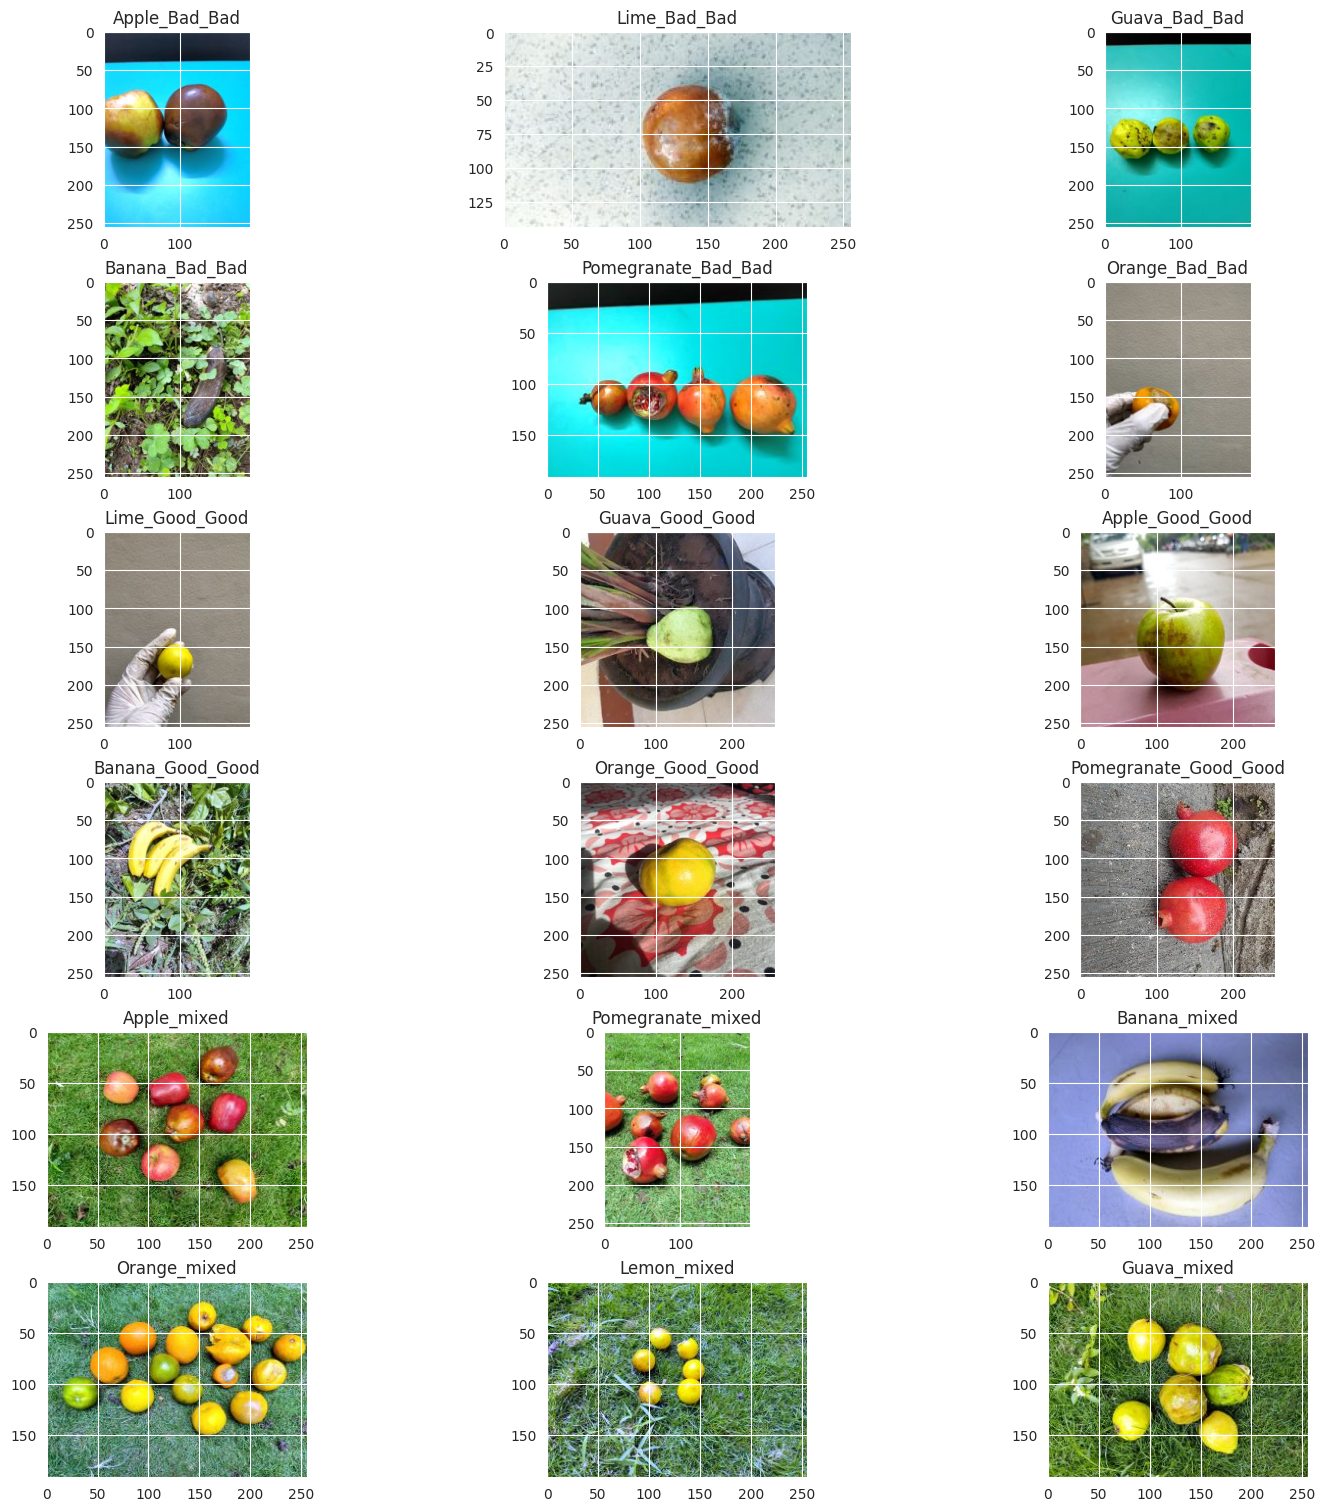

In [ ]:
df['labels']=df['labels'].astype('category')
df['labels'].value_counts()
import matplotlib.pyplot as plt
import seaborn as sns

df['labels'].unique()
fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(15,15), constrained_layout=True)
ax=ax.flatten()
j=0
for i in df['labels'].unique():

    ax[j].imshow(plt.imread(df[df['labels']==i].iloc[0,0]))
    ax[j].set_title(i)
    j=j+1
from sklearn.model_selection import train_test_split
X_train, X_test=train_test_split(df, test_size=0.2, random_state=123)
print(X_train.shape)
print(X_test.shape)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test=train_test_split(df, test_size=0.2, random_state=123)
print(X_train.shape)
print(X_test.shape)

(15664, 2)
(3917, 2)


In [ ]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
trainGen = ImageDataGenerator(preprocessing_function=preprocess_input,
                              validation_split=0.2)
testGen =ImageDataGenerator(preprocessing_function= preprocess_input)
X_train_img = trainGen.flow_from_dataframe(dataframe=X_train,
                                           x_col='filepaths',
                                           y_col='labels',
                                           class_mode='categorical',
                                           subset='training',
                                           batch_size=32)
X_val_img = trainGen.flow_from_dataframe(dataframe=X_train,
                                         x_col='filepaths',
                                         y_col='labels',
                                         class_mode='categorical',
                                         subset='validation',
                                         batch_size=32)
X_test_img =testGen.flow_from_dataframe(dataframe=X_test,
                                        x_col='filepaths',
                                        y_col='labels',
                                        class_mode='categorical',
                                        batch_size=32,
                                        shuffle=False)

Found 12532 validated image filenames belonging to 18 classes.
Found 3132 validated image filenames belonging to 18 classes.
Found 3917 validated image filenames belonging to 18 classes.


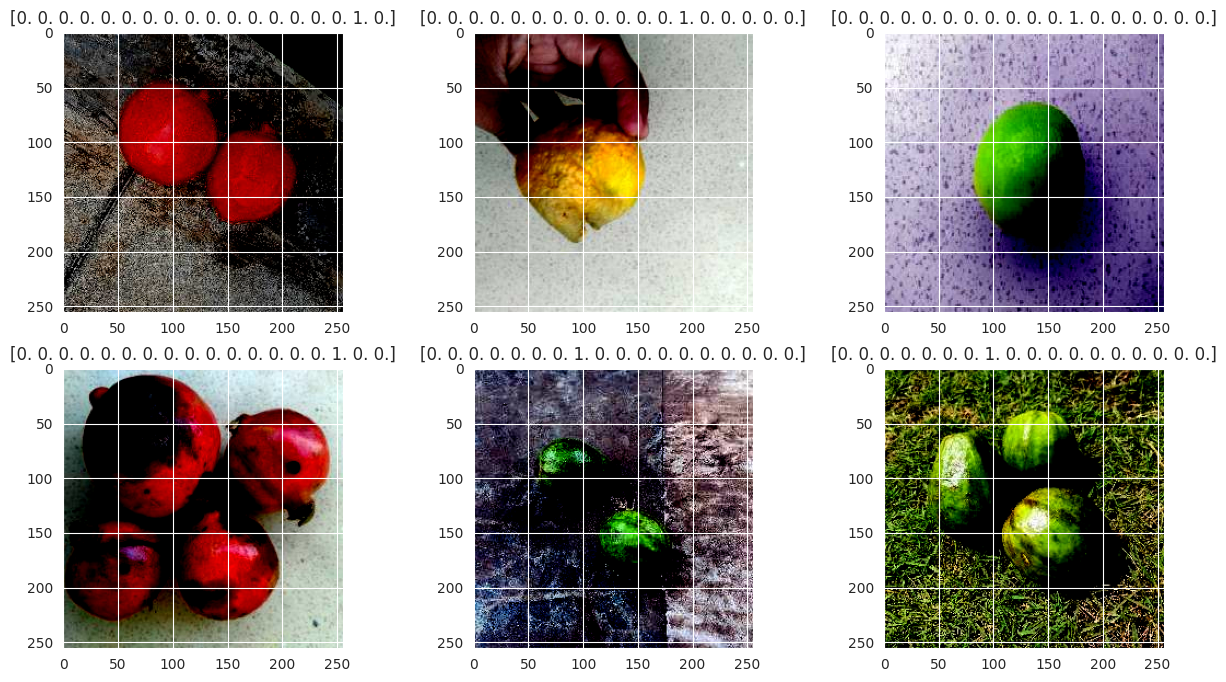

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fit, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
ax = ax.flatten()
j = 0
for _ in range(6):
    img, label = X_test_img.next()
    ax[j].imshow(img[0])
    ax[j].set_title(str(label[0]))  # Convert label to string
    j += 1
plt.show()


In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2)
])
#A pre-trained convolutional neural network from the Inception famil
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D
#Membuat base model dari pre-trained model dengan Inception ResNetV2
pre_trained= InceptionResNetV2(include_top=False,
                               input_shape=image_shape)
#Freeze the convolutional base
pre_trained.trainable=False

inputs = pre_trained.input

x = data_augmentation(inputs)
x = pre_trained(x, training=False)
x = GlobalAveragePooling2D()(x)
x=Dense(256, activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(128, activation='relu')(x)
output=Dense(18, activation='softmax')(x)
model = Model(inputs=inputs, outputs=output)


#Compile the model
base_learning_rate = 0.0001
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              metrics=['accuracy'])

219055592/219055592 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 inception_resnet_v2 (Funct  (None, 6, 6, 1536)        54336736  
 ional)                                                          
                                                                 
 global_average_pooling2d (  (None, 1536)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               393472    
                                                                 
 dropout (Dropout)           (None, 256)               0     

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=1)

initial_epoch = 10
results = model.fit(X_train_img,epochs= initial_epoch,
                              validation_data=X_val_img,
                                callbacks=[early_stop])

Epoch 1/10
392/392 [==============================] - 252s 595ms/step - loss: 1.0431 - accuracy: 0.7066 - val_loss: 0.5013 - val_accuracy: 0.8621
Epoch 2/10
392/392 [==============================] - 196s 498ms/step - loss: 0.4724 - accuracy: 0.8595 - val_loss: 0.3496 - val_accuracy: 0.8946
Epoch 3/10
392/392 [==============================] - 182s 464ms/step - loss: 0.3499 - accuracy: 0.8914 - val_loss: 0.2687 - val_accuracy: 0.9163
Epoch 4/10
392/392 [==============================] - 188s 480ms/step - loss: 0.2832 - accuracy: 0.9095 - val_loss: 0.2403 - val_accuracy: 0.9221
Epoch 5/10
392/392 [==============================] - 187s 478ms/step - loss: 0.2381 - accuracy: 0.9256 - val_loss: 0.2061 - val_accuracy: 0.9374
Epoch 6/10
392/392 [==============================] - 189s 483ms/step - loss: 0.2062 - accuracy: 0.9371 - val_loss: 0.1802 - val_accuracy: 0.9441
Epoch 7/10
392/392 [==============================] - 182s 465ms/step - loss: 0.1860 - accuracy: 0.9417 - val_loss: 0.1696 -

Text(0.5, 1.0, 'Loss')

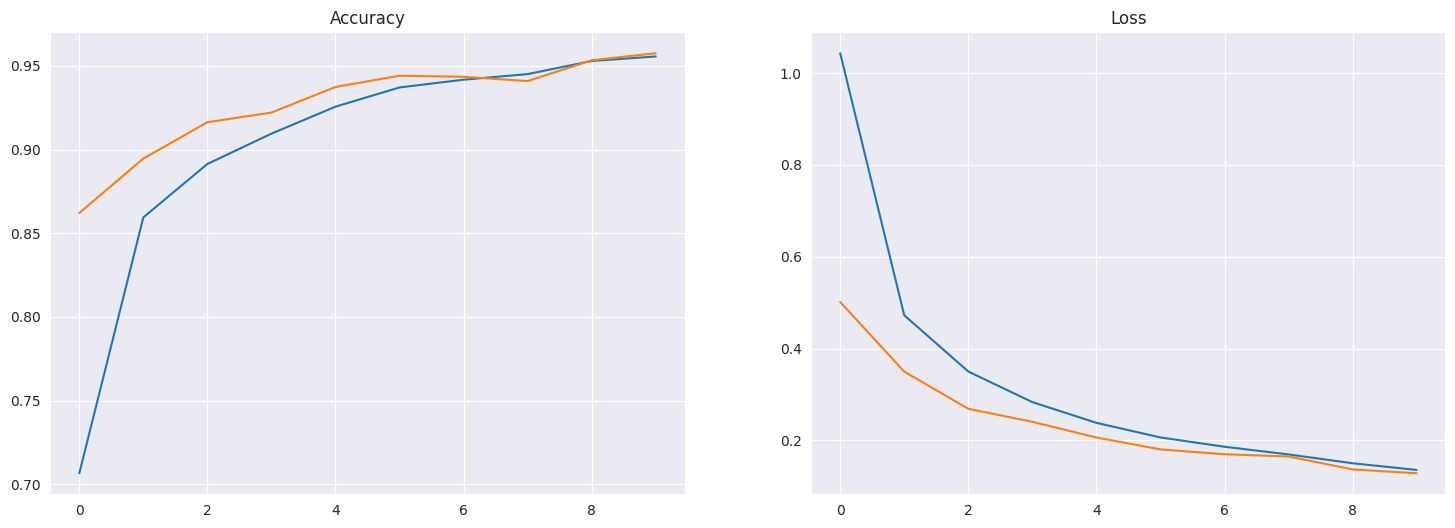

In [ ]:
result_df = pd.DataFrame(results.history)
fig, ax=plt.subplots(nrows=1, ncols=2,figsize=(18,6))
ax=ax.flatten()
ax[0].plot(result_df[['accuracy','val_accuracy']])
ax[0].set_title("Accuracy")
ax[1].plot(result_df[['loss','val_loss']])
ax[1].set_title("Loss")

In [ ]:
pred = model.predict(X_test_img)
pred=np.argmax(pred,axis=1)

123/123 [==============================] - 79s 553ms/step


In [ ]:
pred_df=X_test.copy()
labels={}
for l,v in X_test_img.class_indices.items():
    labels.update({v:l})
pred_df['pred']=pred
pred_df['pred']=pred_df['pred'].apply(lambda x: labels[x])

Accuracy Score: 0.9622159816185857


<Axes: >

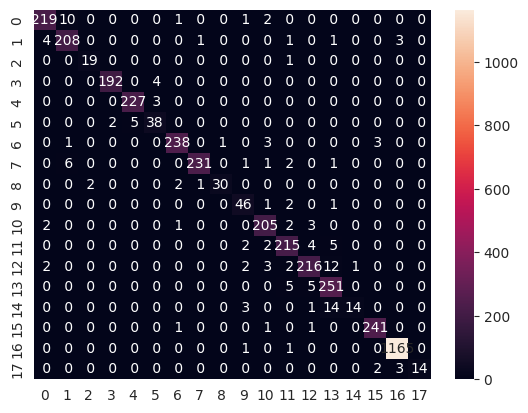

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(f"Accuracy Score: {accuracy_score(pred_df['labels'],pred_df['pred'])}")
sns.heatmap(confusion_matrix(pred_df['labels'],pred_df['pred']), annot=True, fmt='2d')

                                               filepaths  \
12501  /content/drive/MyDrive/IDIAN_FRUIT/Processed I...   
10479  /content/drive/MyDrive/IDIAN_FRUIT/Processed I...   
5852   /content/drive/MyDrive/IDIAN_FRUIT/Processed I...   
14179  /content/drive/MyDrive/IDIAN_FRUIT/Processed I...   
1798   /content/drive/MyDrive/IDIAN_FRUIT/Processed I...   
6459   /content/drive/MyDrive/IDIAN_FRUIT/Processed I...   

                      labels                   pred  
12501       Orange_Good_Good       Orange_Good_Good  
10479       Banana_Good_Good       Banana_Good_Good  
5852          Orange_Bad_Bad         Orange_Bad_Bad  
14179  Pomegranate_Good_Good  Pomegranate_Good_Good  
1798            Lime_Bad_Bad           Lime_Bad_Bad  
6459          Orange_Bad_Bad         Orange_Bad_Bad  


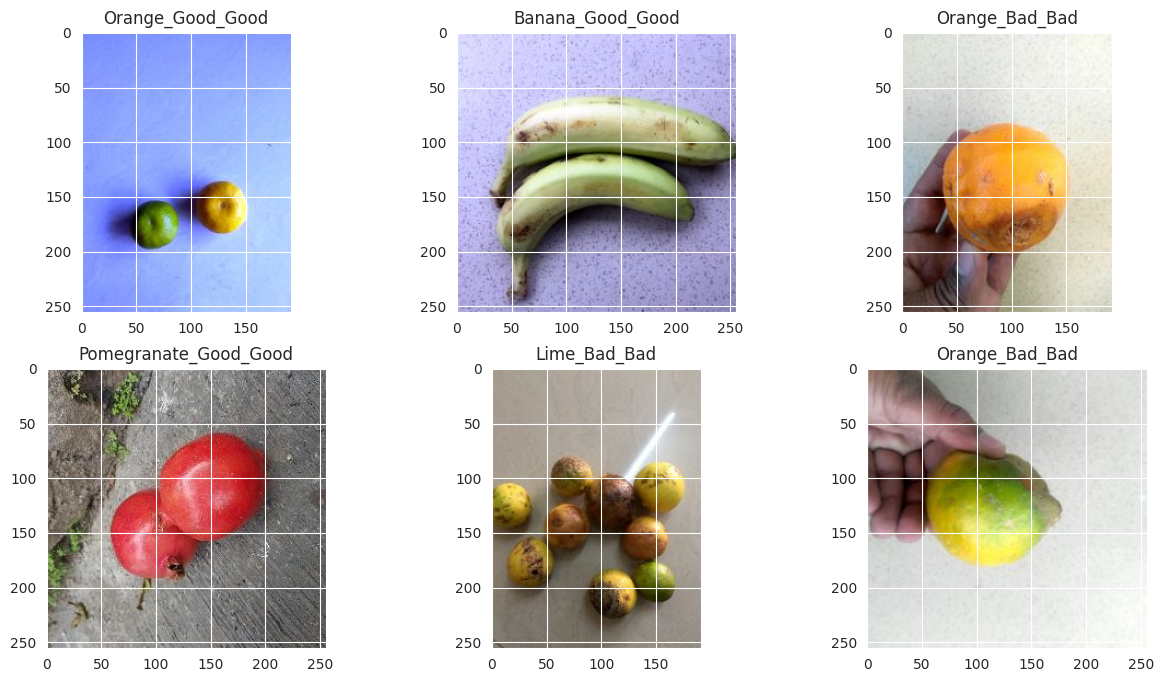

In [ ]:
print(pred_df[pred_df['labels']==pred_df['pred']].head(6))
fig, ax=plt.subplots(nrows=2, ncols=3, figsize=(15,8))
ax=ax.flatten()
imlist=pred_df[pred_df['labels']==pred_df['pred']].head(6).reset_index()
for i in range(0,6):
    ax[i].imshow(plt.imread(imlist['filepaths'][i]))
    ax[i].set_title(imlist['labels'][i])

In [ ]:
model.save("model_fruitNet.h5")